<h1>Mis notas: Machine Learning con Scikit-Learn<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Estimator-API" data-toc-modified-id="Estimator-API-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Estimator API</a></span><ul class="toc-item"><li><span><a href="#Ejemplo-de-aprendizaje-supervisado:-Regresión-lineal-simple" data-toc-modified-id="Ejemplo-de-aprendizaje-supervisado:-Regresión-lineal-simple-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ejemplo de aprendizaje supervisado: Regresión lineal simple</a></span></li><li><span><a href="#Ejemplo-de-aprendizaje-supervisado:-Clasificación" data-toc-modified-id="Ejemplo-de-aprendizaje-supervisado:-Clasificación-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ejemplo de aprendizaje supervisado: Clasificación</a></span></li><li><span><a href="#Ejemplo-de-aprendizaje-no-supervisado:-Reducción-de-la-dimensionalidad" data-toc-modified-id="Ejemplo-de-aprendizaje-no-supervisado:-Reducción-de-la-dimensionalidad-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ejemplo de aprendizaje no supervisado: Reducción de la dimensionalidad</a></span></li><li><span><a href="#Ejemplo-de-aprendizaje-no-supervisado:-Agrupamiento" data-toc-modified-id="Ejemplo-de-aprendizaje-no-supervisado:-Agrupamiento-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ejemplo de aprendizaje no supervisado: Agrupamiento</a></span></li><li><span><a href="#Ejemplo:-Reconocimiento-de-dígitos-manuscritos" data-toc-modified-id="Ejemplo:-Reconocimiento-de-dígitos-manuscritos-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ejemplo: Reconocimiento de dígitos manuscritos</a></span><ul class="toc-item"><li><span><a href="#Reducción-de-la-dimensionalidad" data-toc-modified-id="Reducción-de-la-dimensionalidad-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Reducción de la dimensionalidad</a></span></li><li><span><a href="#Clasificación" data-toc-modified-id="Clasificación-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Clasificación</a></span></li></ul></li></ul></li></ul></div>

> **Disclaimer**: Este notebook contiene mis notas sobre Machine Learning con Scikit-Learn, resumiendo básicamente el [capítulo 5](https://jakevdp.github.io/PythonDataScienceHandbook/05.00-machine-learning.html) de [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) escrito por [Jake VanderPlas](http://vanderplas.com/). Recomiendo leer la fuente original e ir ejecutando todos los ejemplos (___learn by doing!___).

## Intro

[Scikit-Learn](https://scikit-learn.org/) es un paquete para la implementación de Machine Learning en Python, construido sobre NumPy, Scipy y Matplotlib.

La manera más apropiada de pensar en datos dentro de Scikit-learn es usando tablas. Una tabla básica de dos dimensiones contará con las distintas muestras (samples) del dataset en filas, y los atributos (features) como columnas. Es lo que se conoce como la matriz de características `X`, y suele estar contenida en un array de NumPy, un DataFrame de Pandas o una matriz de SciPy.

Las muestras son observaciones de cualquier cosa que puede ser descrita por medidas cuantitativas de sus atributos o características.

Aparte de la matriz de características, generalmente trabajaremos con un array unidimensional de etiquetas `y`, contenido en un array de NumPy o un objeto Series de Pandas, cuya longitud equivale al número de muestras en X.

Vemos un ejemplo con el dataset iris incluido con seaborn:

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Construimos la matriz de características `X` y el vector de etiquetas `y` a partir del DataFrame original:

In [2]:
X_iris = iris.drop('species', axis=1)
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y_iris = iris['species']
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

## Estimator API

La API de Scikit-Learn está diseñada siguiendo unos principios:
 * **Consistencia**: todos los objetos comparten una interfaz común con un conjunto limitado de métodos
 * **Inspección**: todos los valores de parámetros se exponen como atributos públicos
 * **Jerarquía**: los algoritmos son (los únicos) representados por clases, los datasets por arrays de NumPy, DataFrames de Pandas o matrices de SciPy, ....
 * **Composición**: Muchas tareas pueden ser expresadas como una secuencia de tareas más sencillas.

Cada algoritmo de Machine Learning está implementado siguiendo estas líneas, componiendo una interfaz consistente. Para usar un algoritmo concreto seguiremos los siguientes **pasos**:
 1. Importar la clase de Scikit-Learn con el modelo más adecuado
 2. Instanciar la clase con los valores deseados para establecer los hiperparámetros del modelo
 3. Organizar los datos en una matriz de características y un vector de etiquetas
 4. Ajustar el modelo a los datos usando el método `fit()`
 5. Aplicar el modelo a nuevas muestras:
   * Para aprendizaje supervisado predecimos sus etiquetas usando el método `predict()`
   * Para aprendizaje no supervisado normalmente transformamos o inferimos propiedades de los datos usando `transform()` y `predict()`

Vemos esto a través de ejemplos...

### Ejemplo de aprendizaje supervisado: Regresión lineal simple

Usamos datos generados por nosotros mismos:

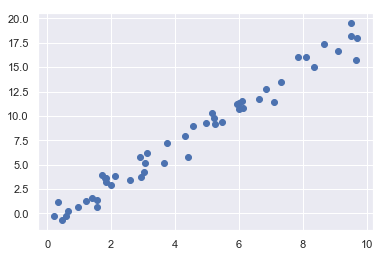

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

**Paso 1**: Importamos la clase adecuada.

In [5]:
from sklearn.linear_model import LinearRegression

**Paso 2**: Escogemos los hiperparámetros del modelo. Dependiendo del que hayamos elegido tendremos que responder a determinadas preguntas. En este caso vamos a fijar el parámetro `fit_intercept` a True para que la línea trazada por nuestro modelo no tenga que pasar necesariamente por el punto (0,0); es decir, la intersección con el eje y será determinada por la línea que mejor se ajuste a las muestras.

In [6]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Paso 3**: Acomodamos los datos en la matriz de características y el vector de etiquetas. En este caso el segundo ya lo tenemos (y), y para el primero simplemente tenemos que convertir el array unidimensional x en bidimensional.

In [7]:
X = x[:, np.newaxis]
X.shape

(50, 1)

**Paso 4**: Aplicamos el modelo a los datos y obtenemos la pendiente (el coeficiente lineal) y el corte con el eje (el offset).

In [8]:
model.fit(X, y)
print('model.coef_:', model.coef_)
print('model.intercept_:', model.intercept_)

model.coef_: [1.9776566]
model.intercept_: -0.9033107255311164


**Paso 5**: Predecimos las etiquetas para nuevas muestras, una vez que el modelo ya ha sido entrenado. En este caso tendremos unas observaciones x y habrá que obtener la predicción para los valores de y.

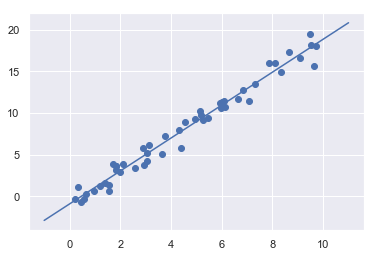

In [9]:
# Generamos muestras de forma arbitraria
xfit = np.linspace(-1, 11, 50)
# Ajustamos igual que hicimos con x
Xfit = xfit[:, np.newaxis]

# Obtenemos las predicciones
yfit = model.predict(Xfit)

# Visualizamos el resultado (dibujar la línea que une las predicciones es dibujar la recta de regresión)
plt.scatter(x, y)
plt.plot(xfit, yfit);

Por último tendríamos que evaluar la eficacia de nuestro modelo (no lo hacemos con este ejemplo puesto que los datos no son reales).

### Ejemplo de aprendizaje supervisado: Clasificación

Usamos el dataset de iris importado previamente, usando parte de las muestras para entrenamiento y el resto para test. Esto se puede hacer de forma manual, pero usaremos el método `train_test_split()`. Para el modelo optaremos por aplicar el algoritmo Naive Bayes Gausiano; muy rápido y sin hiperparámetros a escoger, se usa para realizar una primera clasificación antes de explorar otras opciones.

Aplicamos los mismos pasos que antes:

In [10]:
from sklearn.model_selection import train_test_split                                 #0
from sklearn.naive_bayes import GaussianNB                                           #1

model = GaussianNB()                                                                 #2
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)  #3
model.fit(X_train, y_train)                                                          #4
y_model = model.predict(X_test)                                                      #5

Ahora sí podemos evaluar el error. Acudimos al método `accuracy_score()` para medir la precisión del modelo:

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9736842105263158

### Ejemplo de aprendizaje no supervisado: Reducción de la dimensionalidad

Aplicaremos reducción de la dimensionalidad al dataset de iris para poder visualizar mejor los datos. En nuestro caso aplicaremos PCA, que es una técnica lineal rápida, para pasar de 4 a 2 dimensiones. Seguiremos los mismos pasos que siempre:

In [12]:
from sklearn.decomposition import PCA  #1
model = PCA(n_components=2)            #2

model.fit(X_iris)                      #4
X_2D = model.transform(X_iris)         #5 Transformar los datos a 2 dimensiones aplicando el modelo
X_2D.shape

(150, 2)

Comparamos la visualización original con la nueva, y vemos que en la representación bidimensional las especies están bastante bien separadas, a pesar de que PCA no conoce las etiquetas. Esto indica que la clasificación será fácil.

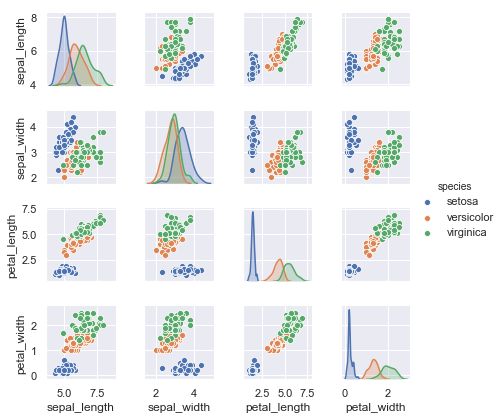

In [13]:
sns.pairplot(iris, hue='species', height=1.5);

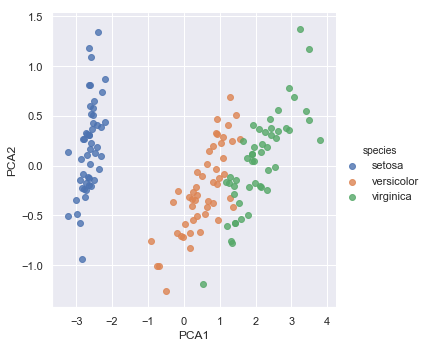

In [14]:
# Insertamos los resultados en el DataFrame original
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
# Visualizamos las 2 dimensiones nuevas
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Ejemplo de aprendizaje no supervisado: Agrupamiento

Aplicaremos clustering al dataset de iris para intentar agrupar los datos sin usar las etiquetas. En nuestro caso usaremos GMM (Gaussian Mixture Model), que intenta modelar los datos como una colección de manchas gaussianas.

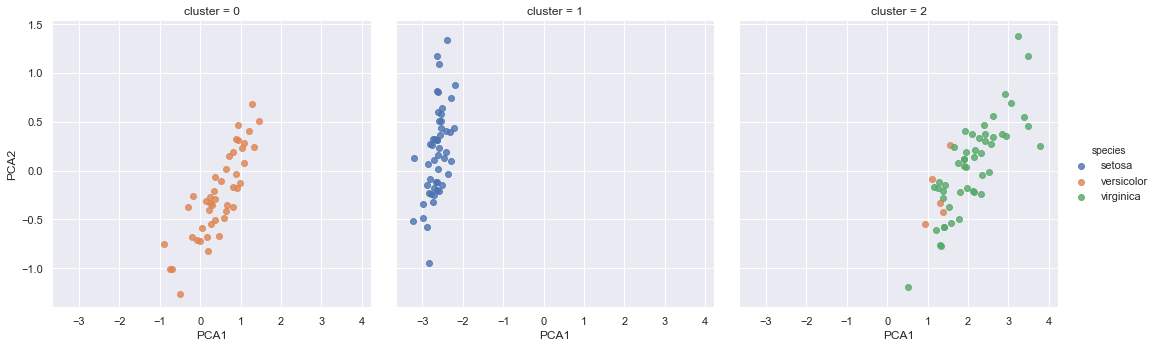

In [15]:
from sklearn.mixture import GaussianMixture                      #1
model = GaussianMixture(n_components=3, covariance_type='full')  #2

model.fit(X_iris)                                                #4
y_gmm = model.predict(X_iris)                                    #5 

iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

### Ejemplo: Reconocimiento de dígitos manuscritos

Escogemos ahora un problema más interesante de OCR (Optical Character Recognition) para clasificar números escritos a mano. Partiremos del dataset disponible en Scikit-Learn, con datos ya preformateados (1797 muestras de 8x8 píxeles)

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

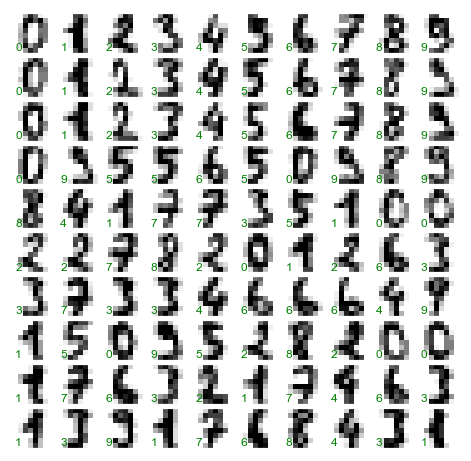

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Trataremos cada uno de los 64 píxeles asociados a cada caracter como un atributo distinto. Tenemos disponibles la matriz de características en digits.data, y el array de etiquetas en digits.target.

#### Reducción de la dimensionalidad

Para intentar visualizar los datos en 2 dimensiones (en lugar de usar 64), usaremos Isomap (algoritmo de Manifold Learning):

In [18]:
from sklearn.manifold import Isomap          #1
iso = Isomap(n_components=2)                 #2
X = digits.data; y = digits.target           #3
iso.fit(digits.data)                         #4
data_projected = iso.transform(digits.data)  #5
data_projected.shape

(1797, 2)

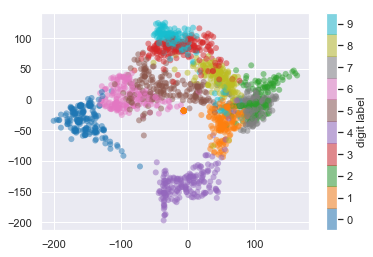

In [19]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, 
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Podemos observar por ejemplo lo bien separados que están el 0 y el 1, y por el contrario la confusión entre el 2 y el 7, o el 3 y el 9. Pero más o menos podemos ver que están razonablemente separados como para poder usar un algoritmo de aprendizaje supervisado.

#### Clasificación

Usaremos de nuevo Naive Bayes Gaussiano:

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model.fit(X_train, y_train)
y_model = model.predict(X_test)

accuracy_score(y_test, y_model)

0.8333333333333334

Obtenemos más de un 80% de efectividad, que no está nada mal. Para mejorar es interesante saber dónde se equivoca nuestro modelo; algo que podemos ver con la matriz de confusión, o volviendo a pintar el grid de caracteres con el valor predecido en rojo si no coincide con el real. Para mejorar los resultados deberíamos optar por otros algoritmos!

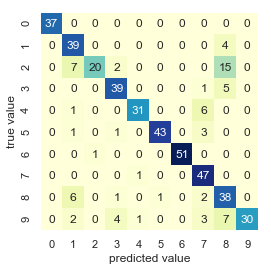

In [21]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value');

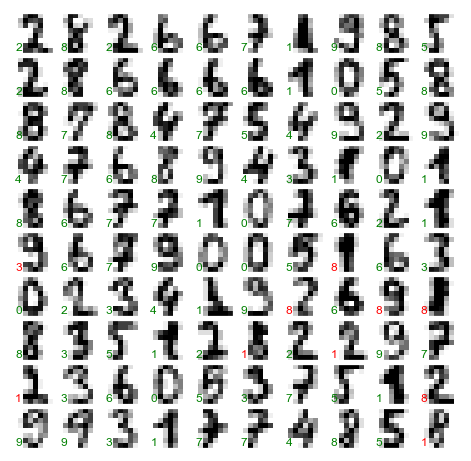

In [22]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = X_test.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes,
            color='green' if (y_test[i] == y_model[i]) else 'red')